<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data exploration</a></span><ul class="toc-item"><li><span><a href="#Loading-the-data-and-formatting-the-variables-correctly" data-toc-modified-id="Loading-the-data-and-formatting-the-variables-correctly-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading the data and formatting the variables correctly</a></span></li><li><span><a href="#Strategy" data-toc-modified-id="Strategy-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Strategy</a></span></li><li><span><a href="#Base-Model" data-toc-modified-id="Base-Model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Base Model</a></span></li><li><span><a href="#Exploring-the-variables" data-toc-modified-id="Exploring-the-variables-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Exploring the variables</a></span><ul class="toc-item"><li><span><a href="#Numeric-variables" data-toc-modified-id="Numeric-variables-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Numeric variables</a></span></li></ul></li><li><span><a href="#Examing-the-missing-values-and-dropping-columns" data-toc-modified-id="Examing-the-missing-values-and-dropping-columns-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Examing the missing values and dropping columns</a></span></li><li><span><a href="#Handling-missing-values" data-toc-modified-id="Handling-missing-values-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Handling missing values</a></span></li><li><span><a href="#Exploring-the-correlation-between-variables" data-toc-modified-id="Exploring-the-correlation-between-variables-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Exploring the correlation between variables</a></span></li><li><span><a href="#Correlation-with-target-for-numerical-features" data-toc-modified-id="Correlation-with-target-for-numerical-features-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Correlation with target for numerical features</a></span></li></ul></li><li><span><a href="#Regression" data-toc-modified-id="Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regression</a></span><ul class="toc-item"><li><span><a href="#Splitting-in-train-and-testset" data-toc-modified-id="Splitting-in-train-and-testset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Splitting in train and testset</a></span></li><li><span><a href="#Different-regression-model" data-toc-modified-id="Different-regression-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Different regression model</a></span></li><li><span><a href="#Performance-on-the-testset" data-toc-modified-id="Performance-on-the-testset-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Performance on the testset</a></span></li><li><span><a href="#Different-random-forest" data-toc-modified-id="Different-random-forest-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Different random forest</a></span></li></ul></li></ul></div>

# Data exploration

## Loading the data and formatting the variables correctly

In [1]:
#libraries for exploration
import pandas as pd
#pandas settings
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_info_columns", 150)
from datetime import datetime

import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, Imputer, Normalizer
from scipy import stats

# plotting missing values
import missingno as msno

#plotting inline matplotlib
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import operator

#Visualisation of models
from yellowbrick.features import FeatureImportances
from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.regressor.alphas import AlphaSelection

In [2]:
import sys
sys.path.append('../ML4QS/PythonCode')

In [3]:
from util.VisualizeDataset import VisualizeDataset #cant get this to work

We load the data as a pandas dataframe and exampine the different features.

In [4]:
mood = pd.read_csv("../Data/dataset_mood_smartphone.csv")

This is a temporal dataset without many features at first sight, however to use it in a predictive model we want to transform it. We can see that for every patient at different times different variables are logged, such as call activity, arousal, etc.

In [5]:
mood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376912 entries, 0 to 376911
Data columns (total 5 columns):
Unnamed: 0    376912 non-null int64
id            376912 non-null object
time          376912 non-null object
variable      376912 non-null object
value         376710 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.4+ MB


We convert the time into actual pandas datetime format and also split date and time in different columns to help us further aggregate per time or per day.

In [6]:
#Formatting of date time fields
def format_date(df):
    #parse string as datetime
    df["time"] = df["time"].apply(lambda x: \
    datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f"))  
    #split date and time so that we can use both lateer
    new_dates, new_times = zip(*[(d.date(), d.time()) for d in df['time']])
    df = df.assign(new_date=new_dates, new_time=new_times)
    df.drop("time", axis=1, inplace=True)
    return df

In [7]:
mood = format_date(mood)

In [8]:
mood.head(5)

,Unnamed: 0,id,variable,value,new_date,new_time
0,1,AS14.01,mood,6.0,2014-02-26,13:00:00
1,2,AS14.01,mood,6.0,2014-02-26,15:00:00
2,3,AS14.01,mood,6.0,2014-02-26,18:00:00
3,4,AS14.01,mood,7.0,2014-02-26,21:00:00
4,5,AS14.01,mood,6.0,2014-02-27,09:00:00


We check the size of the data

In [9]:
mood.shape

(376912, 6)

We have data for 27 unique patients

In [10]:
mood.id.nunique()

27

And there are 19 variables measured, under which the mood which we want to predict

In [11]:
print(mood.variable.nunique())
print(mood.variable.unique())

19
['mood' 'circumplex.arousal' 'circumplex.valence' 'activity' 'screen'
 'call' 'sms' 'appCat.builtin' 'appCat.communication'
 'appCat.entertainment' 'appCat.finance' 'appCat.game' 'appCat.office'
 'appCat.other' 'appCat.social' 'appCat.travel' 'appCat.unknown'
 'appCat.utilities' 'appCat.weather']


In [12]:
mood.isnull().sum().sort_values(ascending = False)

value         202
new_time        0
new_date        0
variable        0
id              0
Unnamed: 0      0
dtype: int64

In [13]:
mood[(mood.variable.str.contains("circumplex")) & (~mood.value.isnull())]

,Unnamed: 0,id,variable,value,new_date,new_time
5641,5642,AS14.01,circumplex.arousal,-1.0,2014-02-26,13:00:00
5642,5643,AS14.01,circumplex.arousal,-1.0,2014-02-26,15:00:00
5643,5644,AS14.01,circumplex.arousal,0.0,2014-02-26,18:00:00
5644,5645,AS14.01,circumplex.arousal,1.0,2014-02-26,21:00:00
5645,5646,AS14.01,circumplex.arousal,-2.0,2014-02-27,09:00:00
5646,5647,AS14.01,circumplex.arousal,1.0,2014-02-27,12:00:00
5647,5648,AS14.01,circumplex.arousal,1.0,2014-02-27,15:00:00
5648,5649,AS14.01,circumplex.arousal,-1.0,2014-03-21,09:00:00
5649,5650,AS14.01,circumplex.arousal,0.0,2014-03-21,11:00:00
5650,5651,AS14.01,circumplex.arousal,1.0,2014-03-21,15:00:00


In [14]:
mood.head()

,Unnamed: 0,id,variable,value,new_date,new_time
0,1,AS14.01,mood,6.0,2014-02-26,13:00:00
1,2,AS14.01,mood,6.0,2014-02-26,15:00:00
2,3,AS14.01,mood,6.0,2014-02-26,18:00:00
3,4,AS14.01,mood,7.0,2014-02-26,21:00:00
4,5,AS14.01,mood,6.0,2014-02-27,09:00:00


In [15]:
mood[mood.variable=='activity']

,Unnamed: 0,id,variable,value,new_date,new_time
16927,16928,AS14.01,activity,0.071429,2014-03-20,22:00:00
16928,16929,AS14.01,activity,0.091667,2014-03-20,23:00:00
16929,16930,AS14.01,activity,0.008333,2014-03-21,00:00:00
16930,16931,AS14.01,activity,0.000000,2014-03-21,01:00:00
16931,16932,AS14.01,activity,0.000000,2014-03-21,02:00:00
16932,16933,AS14.01,activity,0.032787,2014-03-21,03:00:00
16933,16934,AS14.01,activity,0.000000,2014-03-21,04:00:00
16934,16935,AS14.01,activity,0.000000,2014-03-21,05:00:00
16935,16936,AS14.01,activity,0.000000,2014-03-21,06:00:00
16936,16937,AS14.01,activity,0.000000,2014-03-21,07:00:00


We can see that the different variables were started to be logged on different days... We have to deal with that somehow or throw away some lines.

In [16]:
mood.groupby(['id', 'variable'])['new_date'].min()

id       variable            
AS14.01  activity                2014-03-20
         appCat.builtin          2014-03-20
         appCat.communication    2014-03-20
         appCat.entertainment    2014-03-20
         appCat.finance          2014-03-21
         appCat.game             2014-03-28
         appCat.office           2014-03-21
         appCat.other            2014-03-20
         appCat.social           2014-03-20
         appCat.travel           2014-03-21
         appCat.unknown          2014-03-20
         appCat.utilities        2014-03-20
         appCat.weather          2014-03-23
         call                    2014-02-17
         circumplex.arousal      2014-02-26
         circumplex.valence      2014-02-26
         mood                    2014-02-26
         screen                  2014-03-20
         sms                     2014-02-19
AS14.02  activity                2014-03-17
         appCat.builtin          2014-03-14
         appCat.communication    2014-03-14
  

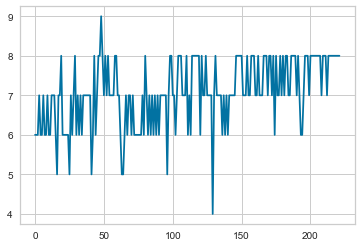

In [17]:
mood[(mood.variable=='mood') & (mood.id=='AS14.01')].value.plot()

## Strategy

We will try for different lengths of period an aggregation of all variables. The aggregation type depends on the variable.

- mood: average of the previous period
- arousal: average of the previous period
- valence: average of the previous period
- activity: average of the previous period
- screen: total screen activity so the sum
- call: number of calls made so the sum
- sms: number of sms so the sum
- for all apps: total duration so the sum


For variables related to duration it seems logical to take the total time for the previous day (or previous days depending on the window). However, it might also be that the screen time before bed impacts the mood the next day.

We define a method to preprocess the data, this includes:
- pivoting the variables so that we get a feature per variable
- aggregating per day
- taking moving averages or sum on a defined backwards period
- define the new target variable as the average mood over the day

**We create a dictionary for aggregation and for windowing so that we can play with the windows later**

In [18]:
agg_columns = list(mood.variable.unique())
agg_columns

['mood',
 'circumplex.arousal',
 'circumplex.valence',
 'activity',
 'screen',
 'call',
 'sms',
 'appCat.builtin',
 'appCat.communication',
 'appCat.entertainment',
 'appCat.finance',
 'appCat.game',
 'appCat.office',
 'appCat.other',
 'appCat.social',
 'appCat.travel',
 'appCat.unknown',
 'appCat.utilities',
 'appCat.weather']

We define a custom aggregation function getting the slope, however it will appear this doesn't give a good predictor

In [19]:
def gradient(Xvalues):
    #Uses least squares method.
    #Returns the gradient of two array vectors (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html)
    X = Xvalues[~np.isnan(Xvalues)]
    A = np.vstack([X, np.ones(len(X))]).T
    m, c = np.linalg.lstsq(A, range(0,len(X)))[0]
    return m

To start we take sum for the durations and mean for the ordinal values.

In [20]:
agg_dict = {}
for x in agg_columns:
    if x in ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity']:
        agg_dict.update({x: np.nanmean})
    else: agg_dict.update({x:np.nansum})
agg_dict

{'activity': <function numpy.lib.nanfunctions.nanmean>,
 'appCat.builtin': <function numpy.lib.nanfunctions.nansum>,
 'appCat.communication': <function numpy.lib.nanfunctions.nansum>,
 'appCat.entertainment': <function numpy.lib.nanfunctions.nansum>,
 'appCat.finance': <function numpy.lib.nanfunctions.nansum>,
 'appCat.game': <function numpy.lib.nanfunctions.nansum>,
 'appCat.office': <function numpy.lib.nanfunctions.nansum>,
 'appCat.other': <function numpy.lib.nanfunctions.nansum>,
 'appCat.social': <function numpy.lib.nanfunctions.nansum>,
 'appCat.travel': <function numpy.lib.nanfunctions.nansum>,
 'appCat.unknown': <function numpy.lib.nanfunctions.nansum>,
 'appCat.utilities': <function numpy.lib.nanfunctions.nansum>,
 'appCat.weather': <function numpy.lib.nanfunctions.nansum>,
 'call': <function numpy.lib.nanfunctions.nansum>,
 'circumplex.arousal': <function numpy.lib.nanfunctions.nanmean>,
 'circumplex.valence': <function numpy.lib.nanfunctions.nanmean>,
 'mood': <function nump

Lag is 5 days for the ordinal values and 1 for the duration. 

In [25]:
window_dict = {}
for x in agg_columns:
    if x in ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity']:
        window_dict.update({x: 5})
    else: window_dict.update({x:5})
window_dict

{'activity': 5,
 'appCat.builtin': 5,
 'appCat.communication': 5,
 'appCat.entertainment': 5,
 'appCat.finance': 5,
 'appCat.game': 5,
 'appCat.office': 5,
 'appCat.other': 5,
 'appCat.social': 5,
 'appCat.travel': 5,
 'appCat.unknown': 5,
 'appCat.utilities': 5,
 'appCat.weather': 5,
 'call': 5,
 'circumplex.arousal': 5,
 'circumplex.valence': 5,
 'mood': 5,
 'screen': 5,
 'sms': 5}

In [26]:
window_agg_dict = {}
for x in agg_columns:
    if x in ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity']:
        window_agg_dict.update({x: np.nanmean})
    else: window_agg_dict.update({x:np.nansum})
window_agg_dict

{'activity': <function numpy.lib.nanfunctions.nanmean>,
 'appCat.builtin': <function numpy.lib.nanfunctions.nansum>,
 'appCat.communication': <function numpy.lib.nanfunctions.nansum>,
 'appCat.entertainment': <function numpy.lib.nanfunctions.nansum>,
 'appCat.finance': <function numpy.lib.nanfunctions.nansum>,
 'appCat.game': <function numpy.lib.nanfunctions.nansum>,
 'appCat.office': <function numpy.lib.nanfunctions.nansum>,
 'appCat.other': <function numpy.lib.nanfunctions.nansum>,
 'appCat.social': <function numpy.lib.nanfunctions.nansum>,
 'appCat.travel': <function numpy.lib.nanfunctions.nansum>,
 'appCat.unknown': <function numpy.lib.nanfunctions.nansum>,
 'appCat.utilities': <function numpy.lib.nanfunctions.nansum>,
 'appCat.weather': <function numpy.lib.nanfunctions.nansum>,
 'call': <function numpy.lib.nanfunctions.nansum>,
 'circumplex.arousal': <function numpy.lib.nanfunctions.nanmean>,
 'circumplex.valence': <function numpy.lib.nanfunctions.nanmean>,
 'mood': <function nump

In [27]:
def aggregate_time_data(dataframe, list_of_deltas, list_of_aggregations, list_of_window_aggregations):    
    # first pivot the variables so that we get one record per datetime and patient (get out time?)
    pivot_df= dataframe.pivot_table(values='value', index=['id', 'new_date', 'new_time'], \
                                    columns='variable')
    #DO NOT FILL NAN so that pandas only counts the nonzero ones in the means
    #pivot_df.fillna(0, inplace=True)
    #aggregate per day depending on the aggregation type
    daily_df = pivot_df.groupby(['id', 'new_date']).agg(list_of_aggregations)
    #Make mood the target variable
    #daily_df.['target'] = daily_df['mood']
    # shift the other variables 1 day to create new target and take only the previous days into account
    daily_df_shift = daily_df.groupby(['id'])[list(list_of_aggregations.keys())].shift(1)
    #add the target variable (unshifted)
    daily_df_shift['target'] = daily_df['mood']
    #window with the deltas and necessary aggregations
    df_rolling = daily_df_shift
    for x in list_of_deltas.keys():
        df_rolling[x] = daily_df_shift[x].rolling(list_of_deltas.get(x)).agg(list_of_window_aggregations.get(x))   
    return df_rolling.reset_index(level=['id', 'new_date'])  

In [28]:
prepped_mood = aggregate_time_data(mood, window_dict, agg_dict, window_agg_dict)

In [29]:
prepped_mood

,id,new_date,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,target
0,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AS14.01,2014-02-22,NaN,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12.0,NaN,NaN,NaN,0.000000,6.0,NaN
6,AS14.01,2014-02-25,NaN,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12.0,NaN,NaN,NaN,0.000000,7.0,NaN
7,AS14.01,2014-02-26,NaN,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,14.0,NaN,NaN,NaN,0.000000,7.0,6.250000
8,AS14.01,2014-02-27,NaN,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.0,NaN,NaN,NaN,0.000000,7.0,6.333333
9,AS14.01,2014-02-28,NaN,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.0,NaN,NaN,NaN,0.000000,4.0,NaN


## Base Model

For the base model we want to just take the average mood of the past day, so we process the data only with the shift.

In [30]:
window_dict_base = {}
for x in agg_columns:
    window_dict_base.update({x:0})
window_dict_base

{'activity': 0,
 'appCat.builtin': 0,
 'appCat.communication': 0,
 'appCat.entertainment': 0,
 'appCat.finance': 0,
 'appCat.game': 0,
 'appCat.office': 0,
 'appCat.other': 0,
 'appCat.social': 0,
 'appCat.travel': 0,
 'appCat.unknown': 0,
 'appCat.utilities': 0,
 'appCat.weather': 0,
 'call': 0,
 'circumplex.arousal': 0,
 'circumplex.valence': 0,
 'mood': 0,
 'screen': 0,
 'sms': 0}

In [31]:
prepped_mood_base = aggregate_time_data(mood, window_dict_base, agg_dict, agg_dict)

In [33]:
pivot_df= mood.pivot_table(values='value', index=['id', 'new_date', 'new_time'], \
                                    columns='variable')
#DO NOT FILL NAN so that pandas only counts the nonzero ones in the means
#pivot_df.fillna(0, inplace=True)
#aggregate per day depending on the aggregation type
daily_mood = pivot_df.groupby(['id', 'new_date']).agg(agg_dict)
# shift the other variables 1 day to create new target and take only the previous days into account
daily_mood_shift = daily_mood.groupby(['id'])[list(agg_dict.keys())].shift(1)
#add the target variable (unshifted)
daily_mood_shift['target'] = daily_mood['mood']
daily_mood_shift = daily_mood_shift.reset_index(level=['id', 'new_date'])

In [34]:
daily_mood_shift_clean = daily_mood_shift[~np.isnan(daily_mood_shift.mood) & ~np.isnan(daily_mood_shift.target)]
daily_mood_shift_clean['x']= daily_mood_shift_clean['mood']
daily_mood_shift_clean['y']= daily_mood_shift_clean['target']

In [35]:
results = daily_mood_shift_clean[[ 'x', 'y']] 

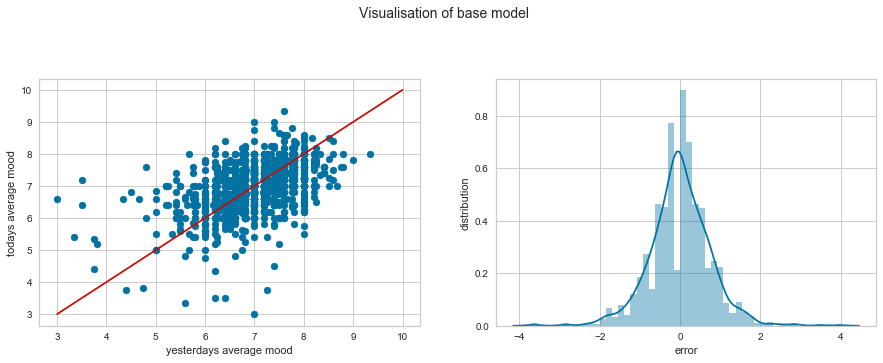

In [36]:
fig = plt.figure(figsize=(15,10))
plt.subplot(221).scatter('x', # Horizontal axis
           'y', # Vertical axis
        data=daily_mood_shift_clean)
plt.subplot(221).plot([3,10], [3,10], color="r", label ="equality")
plt.xlabel("yesterdays average mood")
plt.ylabel("todays average mood")
sns.distplot(results.x-results.y, ax = plt.subplot(222))
plt.xlabel("error")
plt.ylabel("distribution")
plt.suptitle("Visualisation of base model", fontsize=14)
plt.show()

We can wonder what is a good treshold here. I would argue it doesn t matter that we are less than 1 off. We mainly want to predict the range of mood. Setting the treshold of error to 0.6 already gives us 66%. We could argue if it wouldn 't be better to predict the slope (negative or positive) of mood. One down might be worse than one up, especially from a psychologist perspective. This is not something we will cover in this analysis but a good next step. 

In [ ]:
wrong =len(results[np.abs(results.x - results.y)>0.7])
right = len(results[np.abs(results.x - results.y)<0.7])
total = len(results)
print("We have " + str(right/total) + " right answers")
print("wrong: " + str(wrong))
print("right "+ str(right))

In [ ]:
very_wrong =len(results[np.abs(results.x - results.y)>2])
total = len(results)
print("We have " + str(very_wrong/total) + " very wrong answers")
print("very_wrong: " + str(very_wrong))


There is quite some activity data missing for certain days

drop the rows with target nan

In [ ]:
prepped_mood = prepped_mood[~np.isnan(prepped_mood.target)]

In [ ]:
prepped_mood[np.isnan(prepped_mood.mood)]

## Exploring the variables

We perform some basic data analysis on the different variables. Let's first look at the statistics of the numeric variables. 

In [ ]:
prepped_mood.describe()

Most columns are numeric:

In [ ]:
prepped_mood.dtypes.value_counts()

In [ ]:
prepped_mood.describe(include=['O'])

### Numeric variables

We make histograms and boxplots of the different numerical columns. 

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
import plotly.figure_factory as ff

app = dash.Dash()

available_indicators = prepped_mood.columns


app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                id='xaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                #value='Fertility rate, total (births per woman)'
            ),
            dcc.RadioItems(
                id='xaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            ),
            
            dcc.Graph(id='histograms')
        ],
        style={'width': '48%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='yaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                #value='Life expectancy at birth, total (years)'
            ),
            dcc.RadioItems(
                id='yaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            ),
            dcc.Graph(id='boxplots')
            
        ],style={'width': '48%', 'float': 'right', 'display': 'inline-block'})
    ]),
    
    

#    dcc.Slider(
 #       id='year--slider',
  #      min=df['Year'].min(),
   #     max=df['Year'].max(),
    #    value=df['Year'].max(),
     #   step=None,
      #  marks={str(year): str(year) for year in df['Year'].unique()}
   # )
])

@app.callback(
    dash.dependencies.Output('histograms', 'figure'),
    [dash.dependencies.Input('xaxis-column', 'value'),
     dash.dependencies.Input('xaxis-type', 'value'),
     ])
def update_graph(xaxis_column_name,
                 xaxis_type):
    #dff = df[df['Year'] == year_value]

    return {
        'data': [go.Histogram(
            x=prepped_mood[xaxis_column_name]
            #text=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'],
        )],
        'layout': go.Layout(
            xaxis={
                'title': xaxis_column_name,
                'type': 'linear' if xaxis_type == 'Linear' else 'log'
            },
            margin={'l': 40, 'b': 40, 't': 10, 'r': 0},
            hovermode='closest'
        )
    }

@app.callback(
    dash.dependencies.Output('boxplots', 'figure'),
    [dash.dependencies.Input('yaxis-column', 'value'),
    dash.dependencies.Input('yaxis-type', 'value')])


def update_boxplots(yaxis_column_name,
                 yaxis_type):
    #dff = df[df['Year'] == year_value]

     return {
        'data': [go.Box(
            y=prepped_mood[yaxis_column_name]
            #text=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'],
        )],
        'layout': go.Layout(
            yaxis={
                'title': yaxis_column_name,
                'type': 'linear' if yaxis_type == 'Linear' else 'log'
            },
            margin={'l': 40, 'b': 40, 't': 10, 'r': 0},
            hovermode='closest'
        )
    }
        
    

if __name__ == '__main__':
    app.run_server()

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
import plotly.figure_factory as ff

app = dash.Dash()

available_indicators = crimes.columns


app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                id='xaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                #value='Fertility rate, total (births per woman)'
            ),
            dcc.RadioItems(
                id='xaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ],
        style={'width': '48%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='yaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                #value='Life expectancy at birth, total (years)'
            ),
            dcc.RadioItems(
                id='yaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ],style={'width': '48%', 'float': 'right', 'display': 'inline-block'})
    ]),

    dcc.Graph(id='indicator-graphic'),
    dcc.Graph(id='distributions')

#    dcc.Slider(
 #       id='year--slider',
  #      min=df['Year'].min(),
   #     max=df['Year'].max(),
    #    value=df['Year'].max(),
     #   step=None,
      #  marks={str(year): str(year) for year in df['Year'].unique()}
   # )
])

@app.callback(
    dash.dependencies.Output('indicator-graphic', 'figure'),
    [dash.dependencies.Input('xaxis-column', 'value'),
     dash.dependencies.Input('yaxis-column', 'value'),
     dash.dependencies.Input('xaxis-type', 'value'),
     dash.dependencies.Input('yaxis-type', 'value')])
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type):
    #dff = df[df['Year'] == year_value]

    return {
        'data': [go.Scatter(
            x=crimes[xaxis_column_name],
            y=crimes[yaxis_column_name],
            #text=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'],
            mode='markers',
            marker={
                'size': 15,
                'opacity': 0.5,
                'line': {'width': 0.5, 'color': 'black'}
            }
        )],
        'layout': go.Layout(
            xaxis={
                'title': xaxis_column_name,
                'type': 'linear' if xaxis_type == 'Linear' else 'log'
            },
            yaxis={
                'title': yaxis_column_name,
                'type': 'linear' if yaxis_type == 'Linear' else 'log'
            },
            margin={'l': 40, 'b': 40, 't': 10, 'r': 0},
            hovermode='closest'
        )
    }

@app.callback(
    dash.dependencies.Output('distributions', 'figure'),
    [dash.dependencies.Input('xaxis-column', 'value'),
    dash.dependencies.Input('xaxis-type', 'value')])


def update_distributions(xaxis_column_name,
                 xaxis_type):
    #dff = df[df['Year'] == year_value]

    return ff.create_distplot(
            hist_data = [crimes[xaxis_column_name]],
            group_labels = [crimes.columns],
            rug_text=xaxis_column_name,
            
        )
        
    

if __name__ == '__main__':
    app.run_server()

**Distributions** most variables seem to have exponential or log distribution, not normal. We will have to scale them to perform better in the models

In [ ]:


### Plotting Numeric Features
# Looping through and Plotting Numeric features

for column in prepped_mood.select_dtypes(exclude=['object']).columns:   
    
    # Figure initiation
    fig = plt.figure(figsize=(18,12))
    ### Distribution plot
    sns.distplot(prepped_mood[column].dropna(), ax=plt.subplot(221));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density', fontsize=14);
    ### Boxplot
    sns.boxplot(prepped_mood[column].dropna(), ax=plt.subplot(222));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel("Box", fontsize=14)
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for ' + column, fontsize=18);
 
# Printing Chart
plt.show()

    

## Examing the missing values and dropping columns

We use the missing_no package to visualise the missing values. Most columns are fine after aggregation but activity, arousal, valence and mood are not. We can backfill those. 

In [ ]:
msno.matrix(prepped_mood)
plt.show()

In [ ]:
#percentage nulls per column
missing_perc = (prepped_mood.isnull().sum()/prepped_mood.shape[0]).sort_values(ascending = False)
missing_perc

## Handling missing values

We still have only 1 missing value left in other per cap.

In [ ]:
msno.matrix(crimes)
plt.show()

only other per cap is missing in one row. But looking at the pct black and such there are no other people than black, whitem asian and hispanic (the sum is alreayd more than hundred).

Let's plot the wages per capita for other. We impute by the median because of the skewedness.

No missing values are left!

In [ ]:
prepped_mood.isnull().sum().sort_values()

## Exploring the correlation between variables

We now explore the correlation between the variables to see which ones we should consider for the models.

In [ ]:
# GETTING Correllation matrix
corr_mat=prepped_mood.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=False,cmap='cubehelix')
plt.title("Correlation between non-class variables")
plt.show()

## Correlation with target for numerical features

We see that the mood for the past 5 days and valence have the highest absolute correlation if we look patient independent. However, looking at the correlation matrix grouped by patient id, correlation coëfficients wildly vary. This indicateds that a model per patient might be a better idea, although probably more difficult to maintain.

In [ ]:
corr_id = prepped_mood.groupby('id').corr()['target']

In [ ]:
corr_id.unstack()

Valence has a high correlation with mood, which is expected by the circumplex model.

In [ ]:
prepped_mood.corr().abs()['target'].sort_values(ascending = False)

# Regression

## Splitting in train and testset

We use one hot encoding to convert the nominal variables.

In [ ]:
prepped_mood.drop(columns=['new_date'], inplace=True)

In [ ]:
nominal_features = prepped_mood.select_dtypes(include='O')

In [ ]:
nominal_features

We don t need the date anymore now

In [ ]:
prepped_mood = pd.get_dummies(prepped_mood, columns=nominal_features)

In [ ]:
prepped_mood.head()

## Different regression model

It is noteworthy that although we will treat this problem as a regression problem, it could also be treated as a classification problem due to the ordinal nature of the values the patient has to enter for mood. However, we believe it is better to use regression to use the numerical nature of the features and then use a relevant evaluation metric.

We have to center and scale age and fare. We hence setup an scikit-learn pipeline. We make a list of models to try:
- simple regression
- penalized regression
- Simple Decision tree
- Random Forest
- Neural network
- KNN
- XGBoost

We split the dataset in a test and trainset. Our testset size is 50%.

We define a custom scoring function for validating the models.

In [ ]:
def my_custom_loss_func(Y_true, Y_pred):
    error, M = 0, 0.5
    for i in range(0, len(Y_true)):
        z=Y_true[i]-Y_pred[i]
        if abs(z)>M:
            error += 1/len(Y_true)
    return error

my_scorer = make_scorer(my_custom_loss_func, greater_is_better=True)

In [ ]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(prepped_mood.drop(axis=1, columns=['target']), prepped_mood['target'], test_size=0.5)


models=dict()
pipelines = dict()
#Logistic Regression
models.update({"LinearRegression": LinearRegression()})
models.update({"Elastic Net": ElasticNet()}) 
models.update({"Decision Tree": DecisionTreeRegressor()})
models.update({"XGBoost": XGBRegressor()})
models.update({"Random Forest": RandomForestRegressor(n_estimators=1000,random_state=0,n_jobs=-1)})
models.update({"Gradient Boost": GradientBoostingRegressor()})
for i in range(2,40):
    models.update({"KNN" + str(i) : KNeighborsRegressor(n_neighbors=i)})
models.update({"Neural Net": MLPRegressor()})

# Compute train and test errors
train_errors = dict()
test_errors = dict()
imputer = Imputer(missing_values="NaN", axis=0,  strategy="bfill", verbose=5)
preprocessors = [("imputer", imputer), ('reduce_dim', PCA()), ('scaler',StandardScaler()),('normalizer', Normalizer())]

for label, clf in models.items():
    estimators = preprocessors +  [('clf',clf )]
    pipeline = Pipeline(estimators) #standard scale
    pipelines.update({label:pipeline})
    scores = cross_val_score(
        estimator=pipeline,
        X=X_train,
        y=y_train,
        cv=10,
        scoring=my_scorer,
    )
    pipeline.fit(X_test, y_test)
    test_errors.update({label: mean_squared_error(y_test, pipeline.predict(X_test))})
    pipeline.fit(X_train,y_train)
    r2 = r2_score(y_train, pipeline.predict(X_train))
    print("Neg MSE: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    print("r2: %0.2f [%s]" % (r2, label))
    print("test error: %0.2f" % test_errors.get(label))
    
best_model = min(test_errors.items(), key=operator.itemgetter(1))[0]
print("Best model with lowest test error : %s" % best_model)


In [ ]:
dtree = models.get("Decision Tree")

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# #############################################################################
# Plot feature importance
clf= pipelines.get("Random Forest").named_steps["clf"]
from yellowbrick.features import FeatureImportances
# Create a new matplotlib figure
fig = plt.figure(figsize=(10,20))
viz = FeatureImportances(clf,)
viz.fit(X_train, y_train)
viz.poof()

In [ ]:
clf=models.get("KNN1")

estimators = [ ('scaler',StandardScaler()),('normalizer', Normalizer()), ('clf',clf )]
pipeline = Pipeline(estimators) #standard scale
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_train)
pd.DataFrame(data={'predictions': y_pred, 'actual': y_train})

R squared: -167521.55 (+/- 42890.81) [LinearRegression]
test error: 205645.63
R squared: -232087.68 (+/- 62426.01) [Elastic Net]
test error: 295655.91
R squared: -148197.50 (+/- 37426.63) [XGBoost]
test error: 76787.41
R squared: -138506.75 (+/- 34178.45) [Random Forest]
test error: 25326.34
R squared: -149016.16 (+/- 34920.26) [Gradient Boost]
test error: 74549.01
R squared: -151117.59 (+/- 35133.19) [KNN]
test error: 164439.03
R squared: -348716.62 (+/- 87084.29) [Neural Net]
test error: 436115.04
Best model with lowest test error : Random Forest

In [ ]:
print(train_errors)
print(test_errors)

In [ ]:


# Instantiate the linear model and visualizer
for label, clf in models.items():
    estimators = [('reduce_dim', PCA()), ('scaler',StandardScaler()),('normalizer', Normalizer()), ('clf',clf )]
    pipeline = Pipeline(estimators) #standard scale    
    visualizer1 = PredictionError(pipeline)
    visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer1.score(X_test, y_test)
    visualizer = ResidualsPlot(pipeline)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    g1 = visualizer.poof() # Evaluate the model on the test data
    g = visualizer.poof()             # Draw/show/poof the data

In [ ]:
from yellowbrick.features import FeatureImportances
# Create a new matplotlib figure
fig = plt.figure()
ax = fig.add_subplot()
for label, clf in models.items():
    pipeline = Pipeline([('scaler',StandardScaler()),('normalizer', Normalizer()), ('clf',clf )]) #standard scale
    viz = FeatureImportances(pipeline, ax=ax)
    viz.fit(X_train, y_train)
    viz.poof()

## Performance on the testset

We check now the performance on the testset and see that KNN does not perform very well. Random forest seems the most promising so we will tweak that.

In [ ]:
# #############################################################################
# Compute train and test errors
train_errors = list()
test_errors = list()
for label, clf in models.items():
    .fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
enet.set_params(alpha=alpha_optim)
coef_ = enet.fit(X, y).coef_

# #############################################################################
# Plot results functions

import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

# Show estimated coef_ vs true coef
plt.subplot(2, 1, 2)
plt.plot(coef, label='True coef')
plt.plot(coef_, label='Estimated coef')
plt.legend()
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()

## Different random forest

In [ ]:

rfc = RandomForestRegressor(n_jobs=-1,  oob_score = True) 
pipeline = Pipeline([('scaler',StandardScaler()),('normalizer', Normalizer()), ('clf',rfc )]) #standard scale
# Use a grid over parameters of interest
param_grid = {"clf__n_estimators":[10,100,1000],
    "clf__max_depth": [3, None],
              "clf__max_features": ["sqrt", None, "log2"],
              "clf__min_samples_split": [2, 3, 10],
              "clf__min_samples_leaf": [1, 3, 10],
              # "bootstrap": [True, False],
              #"clf__criterion": ["gini", "entropy"]
             }
#pipeline.get_params().keys()
CV_rfc = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv= 10, scoring = 'mean_squared_error')
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

In [ ]:
# #############################################################################
# Plot feature importance
clf= CV_rfc.best_estimator_.steps[2][1]
from yellowbrick.features import FeatureImportances
# Create a new matplotlib figure
fig = plt.figure(figsize=(10,20))

viz = FeatureImportances(clf,)
viz.fit(X_train, y_train)
viz.poof()

In [ ]:
# Create a list of alphas to cross-validate against
alphas = np.logspace(-12, -0.5, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
g = visualizer.poof()             # Draw/show/poof the data